In [32]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import libpysal as ps
from spreg import OLS, ML_Lag, ML_Error, diagnostics, GM_Combo, GM_Error_Het
from spreg.diagnostics_sp import LMtests
import rasterio
import rasterio.plot
import pyproj
from matplotlib_scalebar.scalebar import ScaleBar

pd.set_option('display.max_columns', 500)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [28]:
mun = gpd.read_file("Data/MEX_Mun_2020.shp")
mun['POBTOT_12']

0        23175
1        25250
2        23630
3        16490
4        60386
5         9433
6        80609
7        21115
8         4176
9        64009
10        8689
11       64931
12       41552
13       12880
14       67937
15        7043
16       10940
17       20548
18       40139
19      115141
20       29267
21       19689
22       18370
23       17820
24       55196
25        3270
26       53039
27       20011
28       25920
29        4199
30     1385629
31        8732
32        5920
33       23258
34       67969
35       20465
36       32678
37       24894
38       18982
39        9425
40       47105
41       30855
42        5534
43      172403
44        5368
45       21781
46       14451
47        5307
48       22083
49      106050
50       33588
51       11386
52       53659
53      291839
54       11303
55        7734
56      232852
57        2924
58        7609
59       72230
60       16792
61        3791
62        3095
63       28102
64       31965
65       16431
66        

In [19]:
mun['pe_inac_ratio'] = mun['PE_INAC'] / mun['POBTOT_12']
mun['pdesocup_ratio'] = mun['PDESOCUP_1'] / mun['POBTOT_12']
mun['p15ym_se_ratio'] = mun['P15YM_SE_1'] / mun['POBTOT_12']
mun

,cvegeo,nom_ent,nom_mun,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,p_5ymas,p_5ymas_f,p_5ymas_m,p_12ymas,p_12ymas_f,p_12ymas_m,p_15ymas,p_15ymas_f,p_15ymas_m,p_18ymas,p_18ymas_f,p_18ymas_m,p_3a5,p_3a5_f,p_3a5_m,p_6a11,p_6a11_f,p_6a11_m,p_8a14,p_8a14_f,p_8a14_m,p_12a14,p_12a14_f,p_12a14_m,p_15a17,p_15a17_f,p_15a17_m,p_18a24,p_18a24_f,p_18a24_m,p_15a49_f,p_60ymas,p_60ymas_f,p_60ymas_m,rel_h_m,pob0_14,pob15_64,pob65_mas,pob_afro,pob_afro_f,pob_afro_m,ppobfem,ppobmas,pp_0a2,pp_0a2_f,pp_0a2_m,pp_3ymas,pp_3ymas_f,pp_3ymas_m,pp_5ymas,pp_5ymas_f,pp_5ymas_m,pp_12ymas,pp_12ymas_,pp_12ymas1,pp_15ymas,pp_15ymas_,pp_15ymas1,pp_18ymas,pp_18ymas_,pp_18ymas1,pp_3a5,pp_3a5_f,pp_3a5_m,pp_6a11,pp_6a11_f,pp_6a11_m,pp_8a14,pp_8a14_f,pp_8a14_m,pp_12a14,pp_12a14_f,pp_12a14_m,pp_15a17,pp_15a17_f,pp_15a17_m,pp_18a24,pp_18a24_f,pp_18a24_m,pp_15a49_f,pp_60ymas,pp_60ymas_,pp_60ymas1,ppob0_14,ppob15_64,ppob65_mas,ppob_afro,ppob_afro_,ppob_afro1,shape_Leng,shape_Area,MUN,ENTIDAD,NOM_ENT_1,MUN_1,NOM_MUN_1,LOC,NOM_LOC,POBTOT_1,PE_INAC,PDESOCUP,P15YM_SE,SES,ENTIDAD_1,NOM_ENT_12,MUN_12,NOM_MUN_12,LOC_1,NOM_LOC_1,POBTOT_12,PE_INAC_1,PDESOCUP_1,P15YM_SE_1,SES_1,URBAN_2017,URBAN_AG_2,OBJECTID,MEX_MUN_20,URBAN_NO_L,URBAN_CROP,crop_loss_,geometry,pe_inac_ratio,pdesocup_ratio,p15ym_se_ratio
0,14001,Jalisco,Acatic,23175,11792,11383,1294,639,655,21881,11153,10728,20983,10718,10265,17781,9103,8678,16442,8443,7999,15170,7844,7326,1344,675,669,2756,1375,1381,3224,1606,1618,1339,660,679,1272,599,673,2757,1389,1368,6062,2714,1423,1291,96.53,6733,14458,1984,1518,757,761,50.882416,49.117584,5.583603,2.757282,2.826321,94.416397,48.125135,46.291262,90.541532,46.248112,44.293420,76.724919,39.279396,37.445523,70.947141,36.431499,34.515642,65.458468,33.846818,31.611650,5.799353,2.912621,2.886731,11.892125,5.933118,5.959008,13.911543,6.929881,6.981661,5.777778,2.847896,2.929881,5.488673,2.584682,2.903991,11.896440,5.993528,5.902913,26.157497,11.710895,6.140237,5.570658,29.052859,62.386192,8.560949,6.550162,3.266451,3.283711,114592.976376,3.899446e+08,1,14,Jalisco,1,Acatic,0,Total del Municipio,23175,6225,74,1426,0.333333,14,Jalisco,1,Acatic,0,Total del Municipio,23175,6225,74,1426,0.333333,6.859869e+05,1.054245e+06,1,0,1.623759e+06,1.164722e+05,0.110479,"POLYGON ((-11450402.496 2376825.397, -11450299...",0.268608,0.003193,0.061532
1,14002,Jalisco,Acatl n de Ju rez,25250,12006,13244,1195,597,598,24051,11407,12644,23146,10961,12185,20096,9455,10641,17759,8816,8943,16031,8202,7829,1360,654,706,2595,1298,1297,4057,1501,2556,2337,639,1698,1728,614,1114,2874,1436,1438,6118,2723,1426,1297,110.31,7487,15866,1893,220,87,133,47.548515,52.451485,4.732673,2.364356,2.368317,95.251485,45.176238,50.075248,91.667327,43.409901,48.257426,79.588119,37.445545,42.142574,70.332673,34.914851,35.417822,63.489109,32.483168,31.005941,5.386139,2.590099,2.796040,10.277228,5.140594,5.136634,16.067327,5.944554,10.122772,9.255446,2.530693,6.724752,6.843564,2.431683,4.411881,11.382178,5.687129,5.695049,24.229703,10.784158,5.647525,5.136634,29.651485,62.835644,7.497030,0.871287,0.344554,0.526733,80901.088330,1.838796e+08,2,14,Jalisco,2,Acatlán de Juárez,0,Total del Municipio,25250,9139,194,523,0.390337,14,Jalisco,2,Acatlán de Juárez,0,Total del Municipio,25250,9139,194,523,0.390337,7.393414e+06,2.083653e+06,2,1,8.427105e+06,1.049962e+06,0.503905,"POLYGON ((-11538764.216 2332768.683, -11538488...",0.361941,0.007683,0.020713
2,14003,Jalisco,Ahualulco de Mercado,23630,11846,11784,1064,516,548,22542,11317,11225,21775,10932,10843,18889,9512,9377,17602,8888,8714,16375,8293,8082,1157,587,570,2496,1218,1278,3001,1451,1550,1287,624,663,1227,595,632,2799,1334,1465,5950,3364,1718,1646,99.48,6004,15234,2368,274,131,143,50.131189,49.868811,4.502751,2.183665,2.319086,95.395683,47.892510,47.503174,92.149810,46.263225,45.886585,79.936521,40.253915,39.682607,74.490055,37.613204,36.876851,69.297503,35.095218,34.202285,4.896318,2.484130,2.412188,10.562844,5.154465,5.408379,12.699958,6.140499,6.559458,5.44

In [20]:
mun['URBAN_CROP'] = mun['URBAN_CROP'].fillna(0)
mun['URBAN_AG_2'] = mun['URBAN_AG_2'].fillna(0)
mun["ratio"] = mun["URBAN_CROP"] / mun["URBAN_AG_2"]
print(sum(mun['ratio'].isna()))
mun["ratio"] = mun["ratio"].fillna(0)

31


<Axes: >

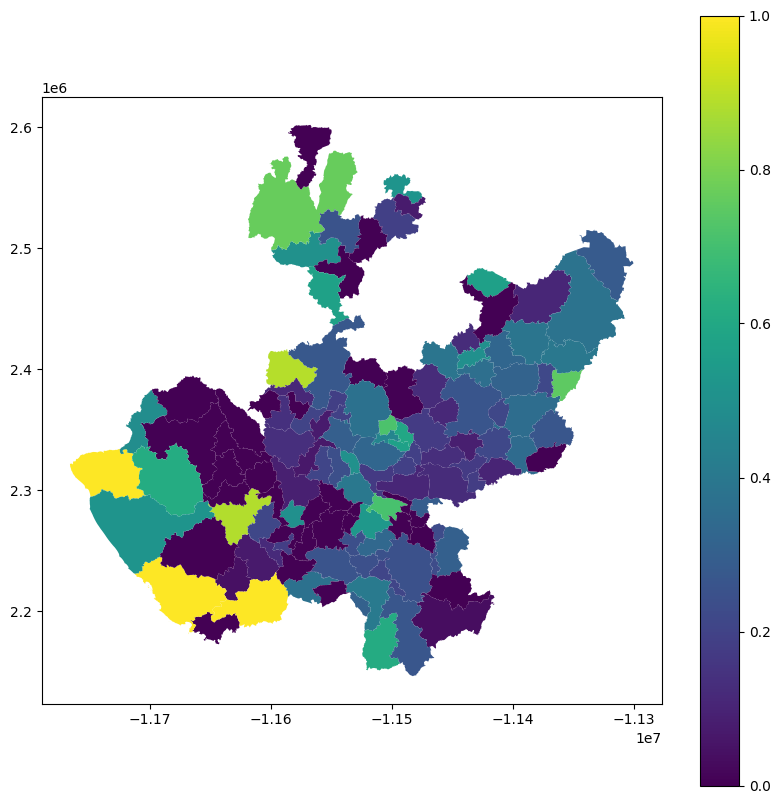

In [21]:
mun.plot("ratio", legend = True, figsize = (10,10))

In [24]:
#Read in Data

Y = mun["ratio"].values.reshape((-1,1))
#X = mun[["SES"]].values
X = mun[['pe_inac_ratio','pdesocup_ratio','p15ym_se_ratio']].values

In [25]:
w = ps.weights.Queen.from_dataframe(mun, use_index = True)

In [26]:
w.transform = "r" # Row-standardization helps make it easier to interpret, equal weighting

# Computes OLS, runs Lagrange Multiplier Tests, and computes Moran's I on residuals
ols = OLS(Y, X, w = w, spat_diag = True, moran = True) 
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:         125
Mean dependent var  :      0.2462                Number of Variables   :           4
S.D. dependent var  :      0.2464                Degrees of Freedom    :         121
R-squared           :      0.0907
Adjusted R-squared  :      0.0681
Sum squared residual:     6.84342                F-statistic           :      4.0228
Sigma-square        :       0.057                Prob(F-statistic)     :    0.009091
S.E. of regression  :       0.238                Log likelihood        :       4.197
Sigma-square ML     :       0.055                Akaike info criterion :      -0.394
S.E of regression ML:      0.2340                Schwarz criterion     :      10.920

------------------------------------------------------------

In [31]:
model = GM_Error_Het(Y, X, w=w, name_y='pixel change %', name_x=['pe_inac_ratio', 'pdesocup_ratio', 'p15ym_se_ratio'])
print(model.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :pixel change %                Number of Observations:         125
Mean dependent var  :      0.2462                Number of Variables   :           4
S.D. dependent var  :      0.2464                Degrees of Freedom    :         121
Pseudo R-squared    :      0.0907
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         0.54008         0.13655         3.95510         0.00008
       pe_inac_ratio        -1.43456         0.46312  

In [33]:
lm_error = diagnostics_sp.LMtests(ols, w, test = 'error')
lm_lag = diagnostics_sp.LMtests(ols, w, test = 'lag')

#spreg.diagnostics_sp.LMtests
print("LM Error test statistic:", lm_error[0])
print("LM Error p-value:", lm_error[1])
print("LM Lag test statistic:", lm_lag[0])
print("LM Lag p-value:", lm_lag[1])

if lm_error[1] < 0.05 and lm_lag[1] < 0.05:
    print("Both tests significant, running robust diagnostics...")
    rlm_error = diagnostics.RLMtests(ols, w, test = 'error')
    rlm_lag = diagnostics.RLMtests(ols, w, test = 'lag')
    if rlm_error[1] < 0.05 and rlm_lag[1] < 0.05:
        print("Both robust LM Error and LM Lag are significant. Further analysis required to choose between SEM and SLM.")
    elif rlm_error[1] < 0.05:
        print("Robust LM Error is significant. Running a Spatial Error Model.")
        model = ML_Error(Y, X, w)
        print(model.summary)
    elif rlm_lag[1] < 0.05:
        print("Robust LM Lag is significant. Running a Spatial Lag Model.")
        model = ML_Lag(Y, X, w)
        print(model.summary)
    else:
        print("Neither robust test is significant. Review model specifications.")
elif lm_error[1] < 0.05:
    print("Significant LM Error, running Spatial Error Model...")
    model = ML_Error(Y, X, w)
    print(model.summary)
elif lm_lag[1] < 0.05:
    print("Significant LM Lag, running Spatial Lag Model...")
    model = ML_Lag(Y, X, w)
    print(model.summary)
else:
    print("No significant LM tests, keeping OLS results.")

NameError: name 'diagnostics_sp' is not defined